## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading Data

In [2]:
df = pd.read_csv("drug200.csv")
print(df.shape)
df.head()

(200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Preprocessing Data

In [3]:
from sklearn import preprocessing

x_data = df[["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]].values
y_data = df["Drug"].values

sex_label_encoder = preprocessing.LabelEncoder()
sex_label_encoder.fit(["F", "M"])
x_data[:, 1] = sex_label_encoder.transform(x_data[:, 1])

bp_label_encoder = preprocessing.LabelEncoder()
bp_label_encoder.fit(["LOW", "NORMAL", "HIGH"])
x_data[:, 2] = bp_label_encoder.transform(x_data[:, 2])

cholesterol_label_encoder = preprocessing.LabelEncoder()
cholesterol_label_encoder.fit(["NORMAL", "HIGH"])
x_data[:, 3] = cholesterol_label_encoder.transform(x_data[:, 3])

x_data[0:5]



array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

## Separating Data

In [4]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.2)

print(f"Train Data Shapes => x: {train_x.shape} and y: {train_y.shape}")
print(f"Test Data Shapes => x: {test_x.shape} and y: {test_y.shape}")

Train Data Shapes => x: (160, 5) and y: (160,)
Test Data Shapes => x: (40, 5) and y: (40,)


## Decision Tree Classifying

In [5]:
from sklearn.tree import DecisionTreeClassifier

drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=4).fit(train_x, train_y)

predicted_y = drugTree.predict(test_x)

print("Actual Drugs:\n", test_y[0:5])
print("\nPredicted Drugs:\n", predicted_y[0:5])

Actual Drugs:
 ['drugY' 'drugY' 'drugY' 'drugA' 'drugX']

Predicted Drugs:
 ['drugY' 'drugY' 'drugY' 'drugA' 'drugX']


## Evaluation

In [6]:
from sklearn.metrics import accuracy_score

print(f"Decision Tree's Accuracy: {accuracy_score(predicted_y, test_y)}")

Decision Tree's Accuracy: 1.0


## Visualization

### Way 1:

['drugA' 'drugB' 'drugC' 'drugX' 'drugY']


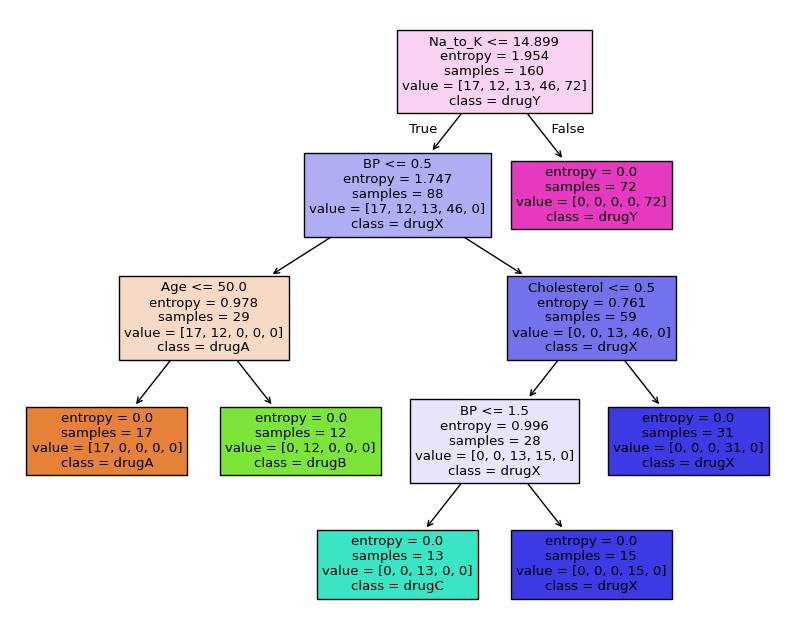

In [ ]:
from sklearn import tree

plt.figure(figsize=(10, 8))
featureNames = df.columns[0:5]

tree.plot_tree(
    drugTree,
    feature_names=featureNames,
    class_names=np.unique(train_y),
    filled=True
)

plt.show()

### Way 2:

In [8]:
from sklearn import tree
from io import StringIO
from pydotplus import graph_from_dot_data
import matplotlib.image as mplimg

featureNames = df.columns[0:5]
dot_data = StringIO()
outputFilePath = "./decision_tree.png"

output = tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(train_y), filled=True,  special_characters=True,rotate=False)
graph = graph_from_dot_data(dot_data.getvalue())
graph.write_png(outputFilePath)

image = mplimg.imread(outputFilePath)
plt.figure(figsize=(100, 200))
plt.imshow(image, interpolation="nearest")